In [50]:
import pandas as pd
nc_cities = pd.read_csv('NC_Cities_cleaned1.csv')
nc_cities.head()

,StopCity,Count
0,Charlotte,18714
1,Raleigh,11533
2,Fayetteville,2823
3,Greensboro,2175
4,Jacksonville,1789


In [51]:
nc_cities[nc_cities.StopCity.str.contains('\d')]

,StopCity,Count
56,Gree04102,244
74,Roan04202,171
88,Tarb03302,134
97,Morg01201,115
100,Shel02302,108
...,...,...
915,Minthill0169,1
960,Ncshp0920,1
968,I95,1
1003,02601,1


In [52]:
nc_cities['StopCity2'] = nc_cities.StopCity.str.replace('\d','',regex=True)

In [53]:
from custom_functions import agg_sort_rename
nc_cities2 = agg_sort_rename(nc_cities)
nc_cities2.head()

,StopCity,Count
0,Charlotte,18714
1,Raleigh,11533
2,Fayetteville,2832
3,Greensboro,2175
4,Jacksonville,1789


In [54]:
nc_cities2[nc_cities2.StopCity.str.contains('\d')]

,StopCity,Count


In [55]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [56]:
from fuzzywuzzy import fuzz

In [57]:
cross = pd.merge(nc_cities2, nc_cities2,how='cross')

In [58]:
nc_cities2.shape

(1005, 2)

In [59]:
cross.shape

(1010025, 4)

In [60]:
cross.head()

,StopCity_x,Count_x,StopCity_y,Count_y
0,Charlotte,18714,Charlotte,18714
1,Charlotte,18714,Raleigh,11533
2,Charlotte,18714,Fayetteville,2832
3,Charlotte,18714,Greensboro,2175
4,Charlotte,18714,Jacksonville,1789


In [61]:
def get_ratio(df):
    return fuzz.token_sort_ratio(df['StopCity_x'],
                                df['StopCity_y'])

In [62]:
cross['Score'] = cross.apply(get_ratio,
                            axis=1)
cross.head()

,StopCity_x,Count_x,StopCity_y,Count_y,Score
0,Charlotte,18714,Charlotte,18714,100
1,Charlotte,18714,Raleigh,11533,12
2,Charlotte,18714,Fayetteville,2832,38
3,Charlotte,18714,Greensboro,2175,21
4,Charlotte,18714,Jacksonville,1789,29


In [63]:
#Any pair that has a high score
filter1 = (cross.Score > 80)
#Each pair will occur twice, reduce to once
filter2 = (cross.Count_x > cross.Count_y)
#Return only real cities in the X column
filter3 = (cross.Count_x > 50)

cross2 = cross[filter1 & filter2 & filter3].copy()
cross.head()

,StopCity_x,Count_x,StopCity_y,Count_y,Score
0,Charlotte,18714,Charlotte,18714,100
1,Charlotte,18714,Raleigh,11533,12
2,Charlotte,18714,Fayetteville,2832,38
3,Charlotte,18714,Greensboro,2175,21
4,Charlotte,18714,Jacksonville,1789,29


In [64]:
cross2.sort_values(by='Count_y', ascending=False, inplace=True)
cross2[0:15]

,StopCity_x,Count_x,StopCity_y,Count_y,Score
47283,Morrisville,279,Mooresville,267,82
77479,Winston Salem,164,Winston-Salem,120,100
6123,Gastonia,1590,Gaston,120,86
51350,Fuquay-Varina,262,Fuquay Varina,119,100
54382,Huntersville Area,256,Huntersville,92,83
21245,Asheville,593,Nashville,58,89
102665,North Topsail Beach,104,Topsail Beach,48,81
39384,Wrightsville Beach,310,Wrightsville Beach`,27,100
119787,Waynesville,81,Hayesville,26,86
15274,High Point,774,Highpoint,24,95


In [65]:
city_list = ['Mooresville','Gaston','Nashville',
            'Hayesville','Marshville']
cross3 = cross2[~ cross2.StopCity_y.isin(city_list)].copy()
cross3.head()

,StopCity_x,Count_x,StopCity_y,Count_y,Score
77479,Winston Salem,164,Winston-Salem,120,100
51350,Fuquay-Varina,262,Fuquay Varina,119,100
54382,Huntersville Area,256,Huntersville,92,83
102665,North Topsail Beach,104,Topsail Beach,48,81
39384,Wrightsville Beach,310,Wrightsville Beach`,27,100


In [66]:
nc_cities2[nc_cities2.StopCity == 'Winston-Salem']

,StopCity,Count
94,Winston-Salem,120


In [67]:
cross3[cross3.StopCity_y == 'Winston-Salem']

,StopCity_x,Count_x,StopCity_y,Count_y,Score
77479,Winston Salem,164,Winston-Salem,120,100


In [68]:
cross4 = cross3.rename(columns={'StopCity_y': 'StopCity',
                               'StopCity_x': 'StopCity2'})
cross4.head()

,StopCity2,Count_x,StopCity,Count_y,Score
77479,Winston Salem,164,Winston-Salem,120,100
51350,Fuquay-Varina,262,Fuquay Varina,119,100
54382,Huntersville Area,256,Huntersville,92,83
102665,North Topsail Beach,104,Topsail Beach,48,81
39384,Wrightsville Beach,310,Wrightsville Beach`,27,100


In [69]:
cross5 = cross4[['StopCity','StopCity2']].copy()
cross5.head()

,StopCity,StopCity2
77479,Winston-Salem,Winston Salem
51350,Fuquay Varina,Fuquay-Varina
54382,Huntersville,Huntersville Area
102665,Topsail Beach,North Topsail Beach
39384,Wrightsville Beach`,Wrightsville Beach


In [70]:
nc_cities2.head()

,StopCity,Count
0,Charlotte,18714
1,Raleigh,11533
2,Fayetteville,2832
3,Greensboro,2175
4,Jacksonville,1789


In [71]:
nc_cities3 = pd.merge(nc_cities2,
                     cross5,
                      how='left',
                     on='StopCity')
nc_cities3[90:96]

,StopCity,Count,StopCity2
90,Mebane,132,NaN
91,Weldon,123,NaN
92,Lake Lure,122,NaN
93,Gaston,120,NaN
94,Winston-Salem,120,Winston Salem
95,Fuquay Varina,119,Fuquay-Varina


In [72]:
nc_cities3.StopCity2.fillna(nc_cities3.StopCity,
                           inplace=True)
nc_cities3.head()

,StopCity,Count,StopCity2
0,Charlotte,18714,Charlotte
1,Raleigh,11533,Raleigh
2,Fayetteville,2832,Fayetteville
3,Greensboro,2175,Greensboro
4,Jacksonville,1789,Jacksonville


In [73]:
nc_cities4 = agg_sort_rename(nc_cities3)
nc_cities4.head()

,StopCity,Count
0,Charlotte,18717
1,Raleigh,11536
2,Fayetteville,2845
3,Greensboro,2189
4,Jacksonville,1807


In [74]:
nc_cities3.shape

(1024, 3)

In [75]:
nc_cities4.shape

(811, 2)

In [76]:
ht1 = pd.read_csv('hickory_tavern_yelp_reviews.csv')
ht1.text[0]

"Haven't been here in a couple of years...but it was THE ONLY place open on the Fourth of July??? Totally empty at 9 PM at night when we got there.Normally the place is packed when I drive by. So the menu had changed but must say it is still consistently good. I had the Cheese steak sandwich. I know that it is a precooked meat product but it was juicy and had onions and cheese on a great bun! My husband had a Burger that was thick and fantastic. My sister had a Veggie Burger that actually was very good....and what can I say..their Sweet Potato fries are fantastic!   I was glad I stopped back in..."

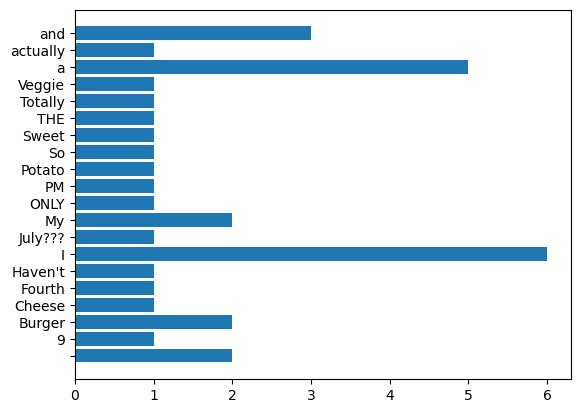

In [77]:
import numpy as np
import matplotlib.pyplot as plt

keys, counts = np.unique(ht1.text[0].split(' '),
                        return_counts=True)

plt.barh(keys[0:20], counts[0:20])
plt.show()

In [78]:
ht1.text[1]

'What\'s with Hickory Taverns always being so dark inside, regardless of how bright it is outside? Maybe it\'s an attempt to contribute to a "Tavern feel" but at this small Hickory Tavern off Charlotte Hwy in Indian Land, it\'s almost depressing. \n\nThe food here is good, and the service has been solid on multiple visits so far. Nothing to blow your socks off, however. I don\'t have any particular "go to" menu items at Hickory Tavern because nothing stands out as "so delicious I want to come back for that". I like to order the steak sandwich and then decompose it and eat it as a steak with bread and fries. I also have tried their lobster roll a few times. It\'s a passable lobster salad, and will do in a fix, but there are (thankfully) better ones in Charlotte these days!\n\nThis is one of the few restaurants where I can feel comfortable ordering unsweet tea, knowing that it won\'t be bitter. They do a good job with their tea brewing. Hey, maybe THAT\'S my "go to", their unsweet iced t

In [79]:
ht1['text'] = ht1.text.str.replace('\n','')
ht1.text[1]

'What\'s with Hickory Taverns always being so dark inside, regardless of how bright it is outside? Maybe it\'s an attempt to contribute to a "Tavern feel" but at this small Hickory Tavern off Charlotte Hwy in Indian Land, it\'s almost depressing. The food here is good, and the service has been solid on multiple visits so far. Nothing to blow your socks off, however. I don\'t have any particular "go to" menu items at Hickory Tavern because nothing stands out as "so delicious I want to come back for that". I like to order the steak sandwich and then decompose it and eat it as a steak with bread and fries. I also have tried their lobster roll a few times. It\'s a passable lobster salad, and will do in a fix, but there are (thankfully) better ones in Charlotte these days!This is one of the few restaurants where I can feel comfortable ordering unsweet tea, knowing that it won\'t be bitter. They do a good job with their tea brewing. Hey, maybe THAT\'S my "go to", their unsweet iced tea!Bette

In [80]:
ht1['text'] = ht1.text.str.replace('?','.',regex=False)
ht1['text'] = ht1.text.str.replace('!','.',regex=False)
ht1['text'] = ht1.text.str.replace(',',' ',regex=False)

In [81]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [82]:
list_of_chars = string.punctuation.replace('.','')
list_of_chars

'!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'

In [83]:
translations = str.maketrans('', '', list_of_chars)
translations

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [84]:
ht1['text'] = ht1.text.str.translate(translations)

In [85]:
ht1['text'] = ht1.text.str.lower()

In [86]:
ht1.text[1]

'whats with hickory taverns always being so dark inside  regardless of how bright it is outside. maybe its an attempt to contribute to a tavern feel but at this small hickory tavern off charlotte hwy in indian land  its almost depressing. the food here is good  and the service has been solid on multiple visits so far. nothing to blow your socks off  however. i dont have any particular go to menu items at hickory tavern because nothing stands out as so delicious i want to come back for that. i like to order the steak sandwich and then decompose it and eat it as a steak with bread and fries. i also have tried their lobster roll a few times. its a passable lobster salad  and will do in a fix  but there are thankfully better ones in charlotte these days.this is one of the few restaurants where i can feel comfortable ordering unsweet tea  knowing that it wont be bitter. they do a good job with their tea brewing. hey  maybe thats my go to  their unsweet iced tea.better for lunch than dinner 

In [87]:
ht1['text2'] = ht1.text.str.replace('.', ' ',regex=False)

In [88]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [91]:
import nltk as nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [92]:
ht1['text_split'] = ht1['text2'].str.split()
ht1.text_split[1]

['whats',
 'with',
 'hickory',
 'taverns',
 'always',
 'being',
 'so',
 'dark',
 'inside',
 'regardless',
 'of',
 'how',
 'bright',
 'it',
 'is',
 'outside',
 'maybe',
 'its',
 'an',
 'attempt',
 'to',
 'contribute',
 'to',
 'a',
 'tavern',
 'feel',
 'but',
 'at',
 'this',
 'small',
 'hickory',
 'tavern',
 'off',
 'charlotte',
 'hwy',
 'in',
 'indian',
 'land',
 'its',
 'almost',
 'depressing',
 'the',
 'food',
 'here',
 'is',
 'good',
 'and',
 'the',
 'service',
 'has',
 'been',
 'solid',
 'on',
 'multiple',
 'visits',
 'so',
 'far',
 'nothing',
 'to',
 'blow',
 'your',
 'socks',
 'off',
 'however',
 'i',
 'dont',
 'have',
 'any',
 'particular',
 'go',
 'to',
 'menu',
 'items',
 'at',
 'hickory',
 'tavern',
 'because',
 'nothing',
 'stands',
 'out',
 'as',
 'so',
 'delicious',
 'i',
 'want',
 'to',
 'come',
 'back',
 'for',
 'that',
 'i',
 'like',
 'to',
 'order',
 'the',
 'steak',
 'sandwich',
 'and',
 'then',
 'decompose',
 'it',
 'and',
 'eat',
 'it',
 'as',
 'a',
 'steak',
 'with'

In [94]:
import itertools
reviews = list(itertools.chain(*ht1.text_split))

In [95]:
nltk.FreqDist(reviews)

FreqDist({'the': 4101, 'and': 2831, 'a': 2341, 'to': 2090, 'i': 1821, 'was': 1505, 'of': 1125, 'for': 1014, 'it': 1006, 'is': 947, ...})

In [96]:
stop = nltk.corpus.stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [97]:
remove_sw = [word for word in reviews if not word in stop]

In [98]:
nltk.FreqDist(remove_sw)

FreqDist({'food': 758, 'good': 558, 'service': 397, 'place': 387, 'great': 377, 'bar': 345, 'tavern': 280, 'time': 273, 'back': 270, 'hickory': 266, ...})

In [100]:
nltk.FreqDist(nltk.ngrams(remove_sw, 2))

FreqDist({('hickory', 'tavern'): 215, ('sports', 'bar'): 86, ('bar', 'food'): 65, ('food', 'good'): 59, ('pretty', 'good'): 51, ('watch', 'game'): 47, ('good', 'food'): 40, ('beer', 'selection'): 38, ('go', 'back'): 34, ('great', 'place'): 34, ...})

In [101]:
nltk.FreqDist(nltk.ngrams(remove_sw, 3))

FreqDist({('sweet', 'potato', 'fries'): 27, ('great', 'place', 'watch'): 12, ('food', 'good', 'service'): 11, ('food', 'pretty', 'good'): 9, ('food', 'always', 'good'): 9, ('food', 'great', 'service'): 9, ('place', 'watch', 'game'): 9, ('buffalo', 'chicken', 'sandwich'): 9, ('went', 'last', 'night'): 8, ('go', 'hickory', 'tavern'): 8, ...})

In [102]:
st = nltk.stem.PorterStemmer()
stemmed_list = [st.stem(i) for i in remove_sw]
stemmed_list

['havent',
 'coupl',
 'year',
 'place',
 'open',
 'fourth',
 'juli',
 'total',
 'empti',
 '9',
 'pm',
 'night',
 'got',
 'normal',
 'place',
 'pack',
 'drive',
 'menu',
 'chang',
 'must',
 'say',
 'still',
 'consist',
 'good',
 'chees',
 'steak',
 'sandwich',
 'know',
 'precook',
 'meat',
 'product',
 'juici',
 'onion',
 'chees',
 'great',
 'bun',
 'husband',
 'burger',
 'thick',
 'fantast',
 'sister',
 'veggi',
 'burger',
 'actual',
 'good',
 'say',
 'sweet',
 'potato',
 'fri',
 'fantast',
 'glad',
 'stop',
 'back',
 'what',
 'hickori',
 'tavern',
 'alway',
 'dark',
 'insid',
 'regardless',
 'bright',
 'outsid',
 'mayb',
 'attempt',
 'contribut',
 'tavern',
 'feel',
 'small',
 'hickori',
 'tavern',
 'charlott',
 'hwi',
 'indian',
 'land',
 'almost',
 'depress',
 'food',
 'good',
 'servic',
 'solid',
 'multipl',
 'visit',
 'far',
 'noth',
 'blow',
 'sock',
 'howev',
 'dont',
 'particular',
 'go',
 'menu',
 'item',
 'hickori',
 'tavern',
 'noth',
 'stand',
 'delici',
 'want',
 'come',
 

In [103]:
wnl = nltk.stem.WordNetLemmatizer()
lem_list = [wnl.lemmatize(i) for i in remove_sw]
lem_list

['havent',
 'couple',
 'year',
 'place',
 'open',
 'fourth',
 'july',
 'totally',
 'empty',
 '9',
 'pm',
 'night',
 'got',
 'normally',
 'place',
 'packed',
 'drive',
 'menu',
 'changed',
 'must',
 'say',
 'still',
 'consistently',
 'good',
 'cheese',
 'steak',
 'sandwich',
 'know',
 'precooked',
 'meat',
 'product',
 'juicy',
 'onion',
 'cheese',
 'great',
 'bun',
 'husband',
 'burger',
 'thick',
 'fantastic',
 'sister',
 'veggie',
 'burger',
 'actually',
 'good',
 'say',
 'sweet',
 'potato',
 'fry',
 'fantastic',
 'glad',
 'stopped',
 'back',
 'whats',
 'hickory',
 'tavern',
 'always',
 'dark',
 'inside',
 'regardless',
 'bright',
 'outside',
 'maybe',
 'attempt',
 'contribute',
 'tavern',
 'feel',
 'small',
 'hickory',
 'tavern',
 'charlotte',
 'hwy',
 'indian',
 'land',
 'almost',
 'depressing',
 'food',
 'good',
 'service',
 'solid',
 'multiple',
 'visit',
 'far',
 'nothing',
 'blow',
 'sock',
 'however',
 'dont',
 'particular',
 'go',
 'menu',
 'item',
 'hickory',
 'tavern',
 'no

In [104]:
nltk.FreqDist(stemmed_list)

FreqDist({'food': 763, 'good': 561, 'place': 442, 'time': 417, 'order': 401, 'servic': 398, 'great': 377, 'bar': 373, 'go': 352, 'tavern': 307, ...})

In [105]:
nltk.FreqDist(nltk.ngrams(stemmed_list, 2))

FreqDist({('hickori', 'tavern'): 241, ('sport', 'bar'): 105, ('bar', 'food'): 67, ('watch', 'game'): 61, ('food', 'good'): 59, ('pretti', 'good'): 51, ('go', 'back'): 48, ('good', 'food'): 41, ('come', 'back'): 38, ('beer', 'select'): 38, ...})

In [106]:
nltk.FreqDist(lem_list)

FreqDist({'food': 763, 'good': 558, 'place': 426, 'time': 413, 'service': 397, 'great': 377, 'bar': 373, 'tavern': 307, 'go': 273, 'one': 271, ...})

In [107]:
nltk.FreqDist(nltk.ngrams(lem_list, 2))

FreqDist({('hickory', 'tavern'): 241, ('sport', 'bar'): 105, ('bar', 'food'): 67, ('food', 'good'): 59, ('watch', 'game'): 53, ('pretty', 'good'): 51, ('good', 'food'): 40, ('beer', 'selection'): 38, ('go', 'back'): 35, ('great', 'place'): 34, ...})

In [108]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiment = [sia.polarity_scores(review) for review in ht1.text]
sentiment

[{'neg': 0.031, 'neu': 0.755, 'pos': 0.215, 'compound': 0.9807},
 {'neg': 0.013, 'neu': 0.801, 'pos': 0.187, 'compound': 0.9918},
 {'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'compound': 0.9169},
 {'neg': 0.17, 'neu': 0.83, 'pos': 0.0, 'compound': -0.889},
 {'neg': 0.089, 'neu': 0.843, 'pos': 0.069, 'compound': -0.1988},
 {'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.9608},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.077, 'neu': 0.874, 'pos': 0.049, 'compound': -0.8941},
 {'neg': 0.026, 'neu': 0.772, 'pos': 0.203, 'compound': 0.9806},
 {'neg': 0.082, 'neu': 0.654, 'pos': 0.264, 'compound': 0.9062},
 {'neg': 0.067, 'neu': 0.834, 'pos': 0.099, 'compound': 0.0653},
 {'neg': 0.072, 'neu': 0.876, 'pos': 0.052, 'compound': -0.4236},
 {'neg': 0.019, 'neu': 0.896, 'pos': 0.085, 'compound': 0.6601},
 {'neg': 0.13, 'neu': 0.745, 'pos': 0.125, 'compound': -0.1215},
 {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.9933},
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'co

In [109]:
scores_df = pd.DataFrame.from_records(sentiment)
scores_df.head()

,neg,neu,pos,compound
0,0.031,0.755,0.215,0.9807
1,0.013,0.801,0.187,0.9918
2,0.000,0.502,0.498,0.9169
3,0.170,0.830,0.000,-0.8890
4,0.089,0.843,0.069,-0.1988


<AxesSubplot:xlabel='stars', ylabel='compound'>

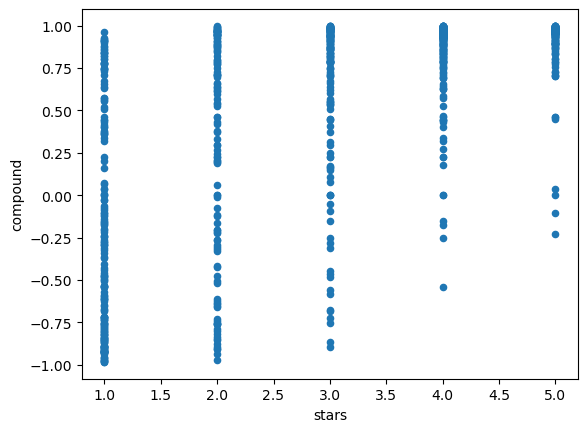

In [110]:
ht2 = ht1.join(scores_df)
ht2.plot.scatter(x='stars', y='compound')

In [111]:
ht2['sentences'] = ht2.text.str.split('.')

In [112]:
ht2['first_sentence'] = ht2.sentences.str[0]

<AxesSubplot:xlabel='stars', ylabel='compound'>

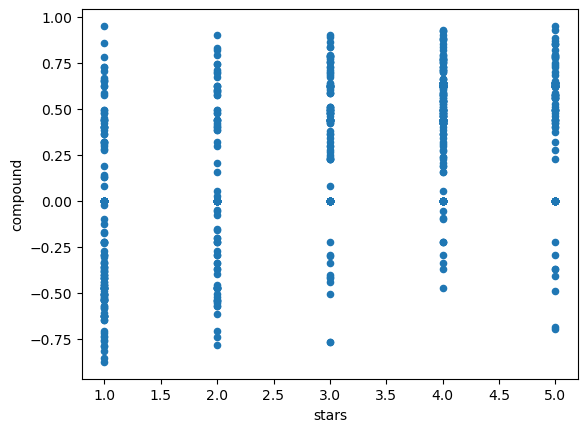

In [113]:
sentiment = [sia.polarity_scores(review) for review in ht2.first_sentence]
scores_df = pd.DataFrame.from_records(sentiment)
ht2 = ht1.join(scores_df)
ht2.plot.scatter(x='stars',y='compound')